# MACHINE LEARNING (Titanic)

In [1]:
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
pd.read_csv('/Users/kriri/Desktop/titanic/train.csv')
pd.read_csv('/Users/kriri/Desktop/titanic/test.csv')

df_train = pd.read_csv('/Users/kriri/Desktop/titanic/train.csv')
df_test = pd.read_csv('/Users/kriri/Desktop/titanic/test.csv')

In [3]:
#apsirašau funkciją, kuri leidžia sukategorizuoti amžių į mane dominančius rėžius:
def age_to_categorical(cnt):
    if cnt <= 5:
        return 'baby'
    elif cnt <= 10:
        return 'child'
    elif cnt <= 18:
        return 'teen'
    elif cnt <= 35:
        return 'adult'
    elif cnt <= 55:
        return 'mature'
    else:
        return 'senior'

#duomenų pasitvarkymui, norint gauti dummies iš abiejų train/test lentelių reikalingiems bruožams juos concat'inant   
def preprocess(df):
    df['Age'] = df['Age'].fillna(np.mean(df_train['Age'])).astype(int)
    df['Age_category'] = df['Age'].apply(age_to_categorical)

    df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Sex')], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Age_category'], prefix='Age_category')], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Pclass'], prefix='Pclass')], axis=1)
    
    return df

# 1. Tiriamojo identifikavimas, klausimo uždavimas, prognozės sukūrimas:

a) Tiriamasis: mirtys (mirė ar išgyveno);  

b) Klausimo išsikėlimas: mane domina kuris žmogus išgyvens pagal požymius lytis, amžius ir kabinos klasė;

c) Prognozuotina, jog atsižvelgiant į socialines/kultūrines bei fizines (jaunesnis/vyresnis tiriamasis) tikėtina, jog didesnis išgyvenamumas bus moterų/vaikų tarpe bei esant aukštesnio soc. sluoksnio.
    

# 2. Pre-processing: amžius, lytis, kabinos klasė:

In [4]:
#data kiekio patikra train'ui
print('sample number of train {}.'.format(df_train.shape[0]))

sample number of train 891.


In [5]:
#data kiekio patikra test'ui
print('sample number of test {}.'.format(df_test.shape[0]))

sample number of test 418.


In [6]:
df_train = preprocess(df_train)
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_male,Age_category_adult,Age_category_baby,Age_category_child,Age_category_mature,Age_category_senior,Age_category_teen,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,1,1,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,0,0,0,1


In [7]:
df_test = preprocess(df_test)
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_male,Age_category_adult,Age_category_baby,Age_category_child,Age_category_mature,Age_category_senior,Age_category_teen,Pclass_1,Pclass_2,Pclass_3
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,...,1,1,0,0,0,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,...,0,0,0,0,1,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,...,1,0,0,0,0,1,0,0,1,0


# 3. Classifier training:

In [8]:
features = ['Sex_female', 'Sex_male',
            'Age_category_adult', 'Age_category_baby',
            'Age_category_child', 'Age_category_mature',
            'Age_category_senior', 'Age_category_teen',
            'Pclass_1', 'Pclass_2', 'Pclass_3']

target = 'Survived'

In [9]:
df_t, df_val = train_test_split(df_train, test_size=0.1, random_state=100)

In [10]:
model = LogisticRegression()

In [11]:
model.fit(df_t[features], df_t[target])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 4. Prognozavimas | palyginimas | išvados: 

In [12]:
#prognozė ant validacijos, tikrinimas ant tikrųjų duomenų.
df_val[f'{target}_prediction'] = model.predict(df_val[features])

print('Accuracy_score: ', accuracy_score(df_val[target], df_val[f'{target}_prediction']))
print('Confusion_matrix: \n', confusion_matrix(df_val[target], df_val[f'{target}_prediction']))

Accuracy_score:  0.7777777777777778
Confusion_matrix: 
 [[47  7]
 [13 23]]


<ipython-input-12-5cdcd6c86da6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[f'{target}_prediction'] = model.predict(df_val[features])


Iš confusion_matrix galima nustatyti, jog modelis:

*47 mirusiuosius atspėjo taip, kaip reikia; 

*23 išgyvenusiuosius taip pat teisingai.

*7, kurie išgyveno spėjo, jog mirs.

*13, kurie mirė spėjo, jog išgyvens.


47 | 7

13 | 23

In [13]:
#klasifikacijos modelių tikimybės
test_sample = df_test.sample(1, random_state=30)
model.predict_proba(test_sample[features])

array([[0.41397888, 0.58602112]])

In [14]:
test_sample['Sex_male']

345    0
Name: Sex_male, dtype: uint8

Matome, jog testinio sample lytis yra moteris, tad pakeičiam lytį iš moters į vyrą:

In [15]:
test_sample['Sex_male'] = 1
test_sample['Sex_female'] = 0

In [16]:
model.predict_proba(test_sample[features])

array([[0.91121826, 0.08878174]])

Pakeitus lytį iš moters į vyrą, išgyvenimo tikimybė sumažėjo iš ~59% iki 9%.

In [17]:
model.coef_[0]

array([ 1.33813693, -1.33800541,  0.02717435,  1.6039732 , -0.26368849,
       -0.41503189, -0.97115408,  0.01885843,  1.04334419,  0.06642807,
       -1.10964074])

([<matplotlib.axis.XTick at 0x10c9ab280>,
 <a list of 11 Text major ticklabel objects>)

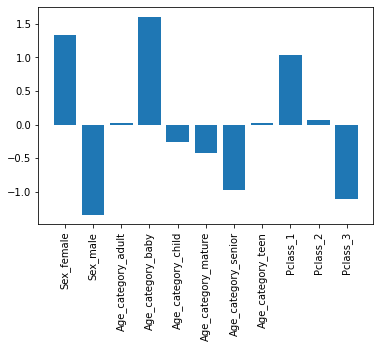

In [18]:
plt.bar(features, model.coef_[0])
plt.xticks(features, rotation=90)

Pagal modelio svorius galima matyti, kad labiausiai tikėtina išgyventi buvo moterims, vaikams ir pirmos klasės keleiviams. Mažiau tikėtina vyrams, senjorams ir 3 klasės keleiviams.